In [6]:
#only keeping the features which have a feature loading value more than 0.2 for PC1
#drop time, events, wearable, soc, cvip, cpu, gpu, 5v_sys, wlan, nvme_pwr1, nvme_pwr3, vddp_run, vddp_s5, LPDDR_PWR, PROC_TOT_PWR

In [ ]:
import pandas as pd 
dataset = pd.read_csv("./blinds_edited.csv")
print(dataset.columns)

,time,wearable,soc,cvip,cpu,gpu,5v_sys,wlan,nvme_pwr1,nvme_pwr3,...,THERM_TOT_PWR-throttle,Tboard_soc1tmp,Tdiode_soc1tmp,battery,chrgr,ddr1,ddr2,mem,mero2,vrm
0,0.003,4423000,1050000,2138000,1080000,105000,5070000,125000,0,5000,...,25000000,111.2,107.60,80.60,105.5750,110.7500,109.1750,102.5366,111.0866,108.2750
1,0.203,4423000,1110000,1315000,630000,105000,4891000,125000,10000,656000,...,25000000,111.2,107.60,80.60,105.5750,110.7500,109.1750,102.5366,111.0866,108.2750
2,0.403,4423000,1296000,1496000,853000,105000,4891000,246000,0,30000,...,25000000,111.2,107.60,80.60,105.5750,110.7500,109.2866,102.5366,111.0866,108.2750
3,0.603,4456000,1184000,2043000,1134000,105000,4891000,246000,0,30000,...,25000000,111.2,107.60,80.60,105.5750,110.7500,109.2866,102.5366,111.0866,108.2750
4,0.803,4456000,1265000,1995000,711000,2864000,5130000,229000,0,30000,...,25000000,111.2,107.60,80.60,105.5750,110.7500,109.2866,102.5366,111.0866,108.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,251.003,5023000,1162000,2399000,1242000,963000,5771000,212000,0,8000,...,25000000,125.6,122.45,83.12,118.8500,124.7000,122.4500,116.1500,125.2616,121.8866
1256,251.203,4886000,1376000,1496000,731000,105000,5745000,203000,0,8000,...,25000000,125.6,122.45,83.12,118.7366,124.5866,122.3366,116.1500,125.2616,121.8866
1257,251.402,4886000,1442000,1354000,1129000,1215000,5745000,203000,0,8000,...,25000000,125.6,122.45,83.12,118.7366,124.5866,122.3366,116.1500,125.2616,121.8866
1258,251.602,4886000,1176000,1267000,1895000,105000,5745000,203000,0,5000,...,25000000,125.6,122.45,83.12,118.7366,124.5866,122.3366,116.1500,125.2616,121.8866


In [14]:
#dropping the appropriate columns 
dataset.drop('wearable', axis=1, inplace = True)
dataset.drop('soc', axis=1, inplace = True)
dataset.drop('cvip', axis=1, inplace = True)
dataset.drop('cpu', axis=1, inplace = True)
dataset.drop('gpu', axis=1, inplace = True)
dataset.drop('5v_sys', axis=1, inplace = True )
dataset.drop('wlan', axis=1, inplace = True)
dataset.drop('nvme_pwr1', axis=1, inplace = True)
dataset.drop('nvme_pwr2', axis=1, inplace = True)
dataset.drop('nvme_pwr3', axis=1, inplace = True)
dataset.drop('vddp_s5', axis=1, inplace = True )
dataset.drop('LPDDR_PWR', axis=1, inplace = True )
dataset.drop('PROC_TOT_PWR', axis=1, inplace = True)
dataset.drop('THERM_TOT_PWR', axis=1, inplace = True)

In [9]:
dataset['vddp_run_ma']=dataset['vddp_run'].rolling(window=5, center = True).mean()
dataset['THERM_TOT_PWR-throttle_ma']=dataset['THERM_TOT_PWR-throttle'].rolling(window=5, center = True).mean()
dataset['Tboard_soc1tmp_ma']=dataset['Tboard_soc1tmp'].rolling(window=5, center = True).mean()
dataset['Tdiode_soc1tmp _ma']=dataset['Tdiode_soc1tmp'].rolling(window=5, center = True).mean()
dataset['battery_ma']=dataset['battery'].rolling(window=5, center = True).mean()
dataset['chrgr_ma']=dataset['chrgr'].rolling(window=5, center = True).mean()
dataset['ddr1_ma']=dataset['ddr1'].rolling(window=5, center = True).mean()
dataset['ddr2_ma']=dataset['ddr2'].rolling(window=5, center = True).mean()
dataset['mem_ma']=dataset['mem'].rolling(window=5, center = True).mean()
dataset['mero2_ma']=dataset['mero2'].rolling(window=5, center = True).mean()


In [10]:
#standardizing 
col_names = dataset.columns
col_values = dataset.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(col_values)
col_values = model.transform(col_values)
df = pd.DataFrame(col_values, columns=col_names)

<Axes: xlabel='time'>

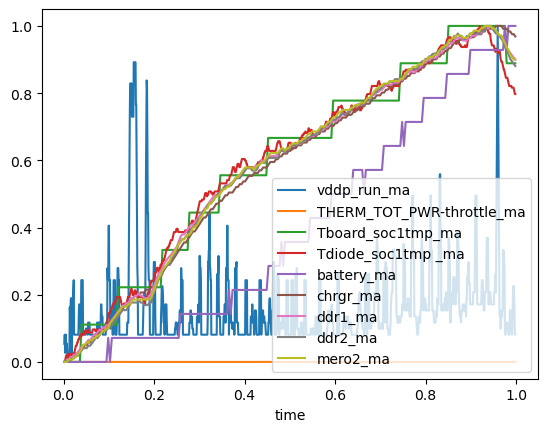

In [11]:
df.plot(x='time', y=['vddp_run_ma','THERM_TOT_PWR-throttle_ma','Tboard_soc1tmp_ma', 'Tdiode_soc1tmp _ma', 'battery_ma', 'chrgr_ma', 'ddr1_ma', 'ddr2_ma', 'mero2_ma'])